<a href="https://colab.research.google.com/github/jeangondorek/Algoritmos-C/blob/main/TrabalhoT1_2jeancanovagondorek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Estudante/Matrícula**:Jean Gondorek/1921101059

# Trabalho T1 - Arquitetura Básica de Redes Neurais

Este trabalho tem como objetivo a compreensão da arquitetura básica de camadas de neurônios de uma rede neural artificial (RNA). A execução deste exercício permitirá aos estudantes o domínio dos métodos necessários para o treinamento e teste de uma RNA utilizando um dataset pré-processado.

## 1. Instruções


O estudante deve treinar uma RNA com camadas densas e estilo feedforward para uma tarefa de classificação utilizando dataset pré-processado conforme especificado a baixo.

Para cada tentativa de construção de arquitetura, mantenha um registro da tentativa e resultado obtido pela rede. Indique qual a lógica utilizada para criação da arquitetura e qual a percepção do resultado em comparação com tentativas anteriores.

Para este trabalho, somente serão permitidas somente as seguintes bibliotecas `python` para o treinamento da RNA:

- `numpy`
- `scipy`
- `tensorflow`
- `scikit-learn`

Para visualização e criação de gráficos, também serão permitidas

- `matplotlib`
- `seaborn`
- `plotly`
- `yellowbrick`

Caso a utilização de quaisquer outras bibliotecas se faça necessária, uma consulta prévia deve ser feita ao professor.


## Entrega

O presente trabalho pode ser feito individualmente ou em dupla. Caso optem pelo trabalho em dupla, o cabeçalho do documento deve indicar quais são os componentes e suas matrículas.

A entrega deverá ser feita através do envio de um arquivo `ZIP` contendo o trabalho dos estudantes, no SIGAA. A data limite para entrega deste trabalho é **24/09/2023, 23h59m**.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(42)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
tf.random.set_seed(42)


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


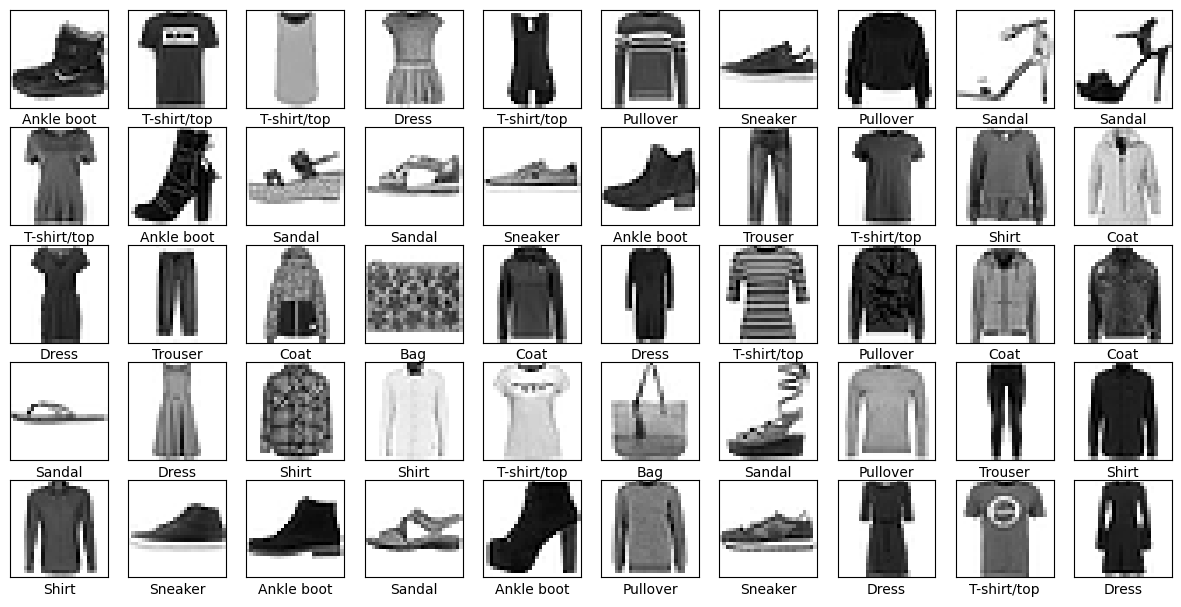

In [ ]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
class_names = ['Non-Top', 'Top']
num_classes = 2

train_labels = np.where(((train_labels == 1) |  (train_labels == 5) | (train_labels == 7) | (train_labels == 8) | (train_labels == 9)), 0, 1)
test_labels = np.where(((test_labels == 1) |  (test_labels == 5) | (test_labels == 7) | (test_labels == 8) | (test_labels == 9)), 0, 1)

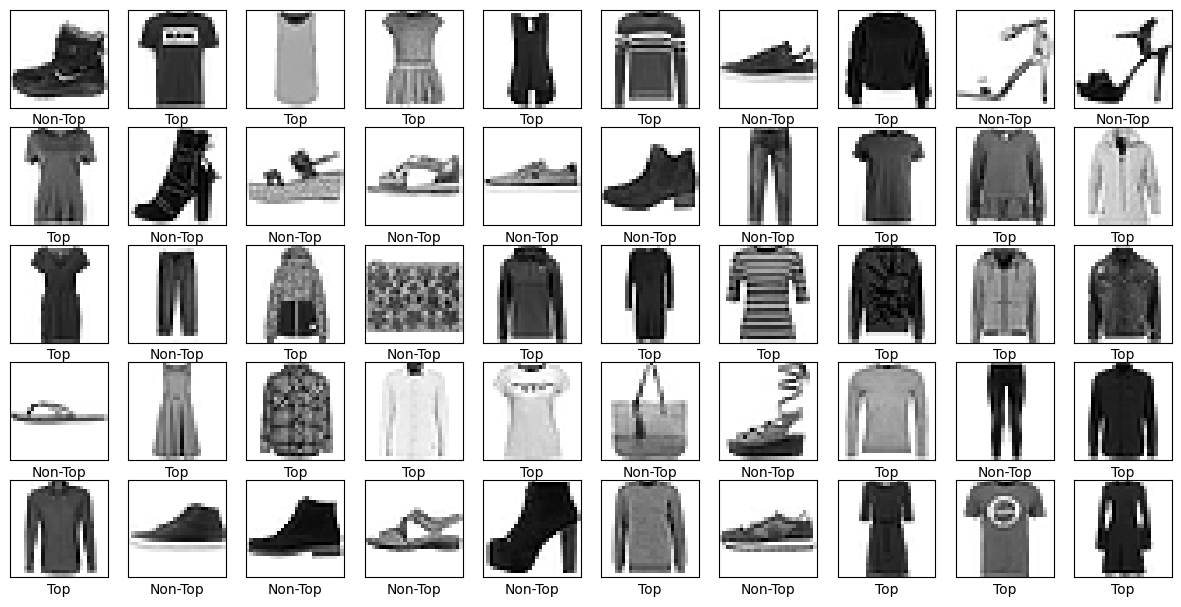

In [ ]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
x_train = train_images.reshape(60000, 784)  ## reorganizando o dataset de treino em 60000 exemplos com 784 features cada
x_test = test_images.reshape(10000, 784)  ## reorganizando o dataset de teste em 60000 exemplos com 784 features cada
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(f'{x_train.shape[0]} exemplos de treino')
print(f'{x_test.shape[0]} exemplos de teste')

y_train = tf.keras.utils.to_categorical(train_labels, num_classes) ## transformando os targets do dataset de treino em classes
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)  ## transformando os targets do dataset de teste em classes

60000 exemplos de treino
10000 exemplos de teste


## Aqui eu estava treinando como poderia fazer e tentando entender mais de como gerar uma rede neural, pode ser que nem tudo esteja de acordo com o que se pede no trabalho, mas foi mais para aprendizado


Importando bibliotecas e dados

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados Fashion MNIST
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()


Mapeando as classes e definindo o que cada uma faz

In [ ]:
top_classes = [0, 2, 3, 4, 6]
bottom_classes = [1, 5, 7, 8, 9]

def map_categories(labels):
    return ['top' if label in top_classes else 'bottom' for label in labels]

y_train_full = map_categories(y_train_full)
y_test = map_categories(y_test)


Explicação

In [ ]:
X_train_full = X_train_full.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


Explicação

In [ ]:
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]


Explicação

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

Explicação

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
y_train = np.array([0 if label == 'top' else 1 for label in y_train])
y_val = np.array([0 if label == 'top' else 1 for label in y_val])
y_test = np.array([0 if label == 'top' else 1 for label in y_test])

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
 722/1500 [=============>................] - ETA: 2s - loss: 0.0606 - accuracy: 0.9794

KeyboardInterrupt: ignored

In [ ]:
y_pred = (model.predict(X_test) > 0.5).flatten()

In [ ]:
# Converter os rótulos em números (0 para 'top' e 1 para 'bottom')
y_test_numeric = np.array([0 if label == 'top' else 1 for label in y_test])

# Calcular a acurácia
accuracy = accuracy_score(y_test_numeric, y_pred)
print(f'Acurácia: {accuracy:.2f}')

In [ ]:
num_images = 30
random_indices = np.random.choice(X_test.shape[0], num_images)
plt.figure(figsize=(18, 18))
for i, index in enumerate(random_indices):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[index].squeeze(), cmap=plt.cm.binary)
    plt.title(f'{y_test[index]}')
plt.show()

## Inclua seu código abaixo desta célula 1


Carregando as bibliotecas utilizadas

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Carregando e mapeando nomes e o valor para cada uma das vestimentas, mais por exposição de como era os dados de entrada.

Em todo caso no carregamento dos valores as tuplas ```X_train_full``` representa as imagens e ```y_train_full``` representa os rotulos o mesmo vale para ```X_test``` e ```y_test``` respectivamente.

In [15]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

Impressão de 30 imagens aleatórias no para mostrar a entrada de dados. Maior dificuldade foi encontrar uma forma de printar mais bonito.

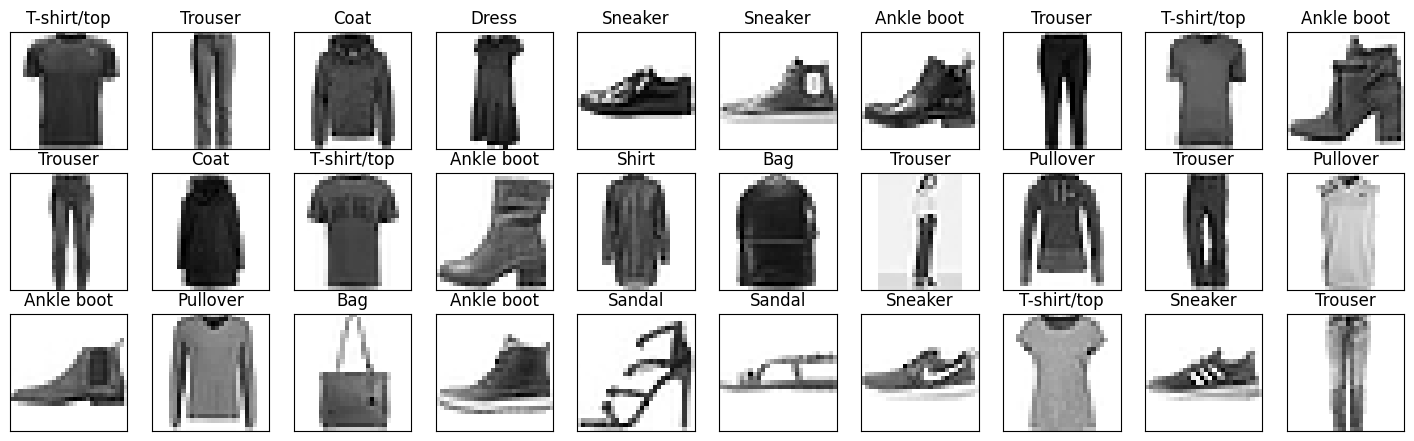

In [16]:
num_images = 30
random_indices = np.random.choice(X_test.shape[0], num_images)
plt.figure(figsize=(18, 18))
for i, index in enumerate(random_indices):
    plt.subplot(10, 10, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[index].squeeze(), cmap=plt.cm.binary)
    plt.title(f'{class_names[y_test[index]]}')

Já aqui inicia o algoritmo de classificação, onde defini os critérios para saber o que é o que. Tendo a definição das respostas em ```top_classes``` e ```bottom_classes```;
Já a função declarada substitui o rotulo original pelo rotulo desejado, ```top``` ou ```bottom```;
Já a aplicação das últimas 2 linhas faz com que seja substituido os valores dos rotulos em cada conjunto de dados.

In [17]:
top_classes = [0, 2, 3, 4, 6]
bottom_classes = [1, 5, 7, 8, 9]

def map_categories(labels):
    return ['top' if label in top_classes else 'bottom' for label in labels]

y_train_full = map_categories(y_train_full)
y_test = map_categories(y_test)

Objetivo colocar tudo em escala entre 0 e 1 num ponto flutuante, tendo em vista estarmos trabalhando com escala de cinza, tendo em vista que a cor é representada por um valor entre 0 e 255 de acordo com a intensidade.

In [18]:
X_train_full = X_train_full.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

As variáveis ``` x_train```  e ``` y_train```  são utilizadas para treino enquanto as ``` x_val```  e ``` t_val```  para validação dos treinos.
A função chamada divide os dados em parte para treino e em parte para validação. Nesse caso separando 0.2 = 20% para validação em ```test_size```.
Já o ```randon_state``` é a seed para geração de um rede neural e mante-la consistente entre uma execução e outra.

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.8, random_state=8)

Aqui é criada e definida a rede neural. A primeira camada ```Flatten``` é a camada de entrada, que foi definida dessa forma pois é para uma imagem 2d, no caso 28x28 e em escala cinza que seria o 1.
Já as demais camadas seriam as camadas ocultas com 128 neuronios e usando a ativação por relu.
Já a ultima camada é a de saida com 1 neuronio e com a ativação por sigmoid que representa um problema de classificação binária.

O aumento de camadas não representou melhora significativa no modelo, assim como o aumento de neuronios. Pelo que teste uma média de 50 a 100 neuronios é suficiente, e algo em torno de 5 a 7 camadas

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(28, activation='relu'),
    keras.layers.Dense(28, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

Aqui é onde é compilada a rede neural e definido o otimizador, a função de perca que deve ser minimizada durante a execução e as metricas para calcular a avaliar o modelo.

In [21]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

Aqui é criado e substituido os valores para o novo padrao ```top``` e ```bottom``` nas camadas de validação, testes e treino

In [22]:
y_train = np.array([0 if label == 'top' else 1 for label in y_train])
y_val = np.array([0 if label == 'top' else 1 for label in y_val])
y_test = np.array([0 if label == 'top' else 1 for label in y_test])

Ainda nos meus testes verificado que quantos mais épocas melhor o treino, com 25 epócas tive resultados expressivos em questão de aprendizado e "custo" que seria o tempo de execução. Com 10 epócas o algoritmo já chega a 99% de accuracy

In [23]:
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_val, y_val))

375/375 [==============================] - 9s 20ms/step - loss: 0.4551 - accuracy: 0.8231 - val_loss: 0.1500 - val_accuracy: 0.9633


Nesse momento é onde o teste acontece.

In [24]:
y_pred = (model.predict(X_test) > 0.5).flatten()
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

313/313 [==============================] - 1s 2ms/step
Acurácia: 0.96


Um gráfico analisando como se comportou a rede durante as epócas

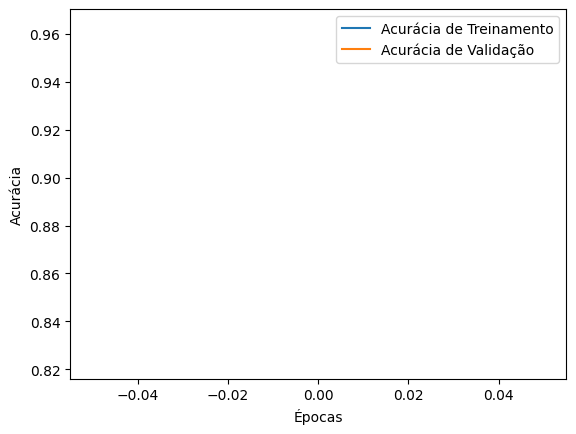

In [25]:
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

Print da classificação final de alguns dados.

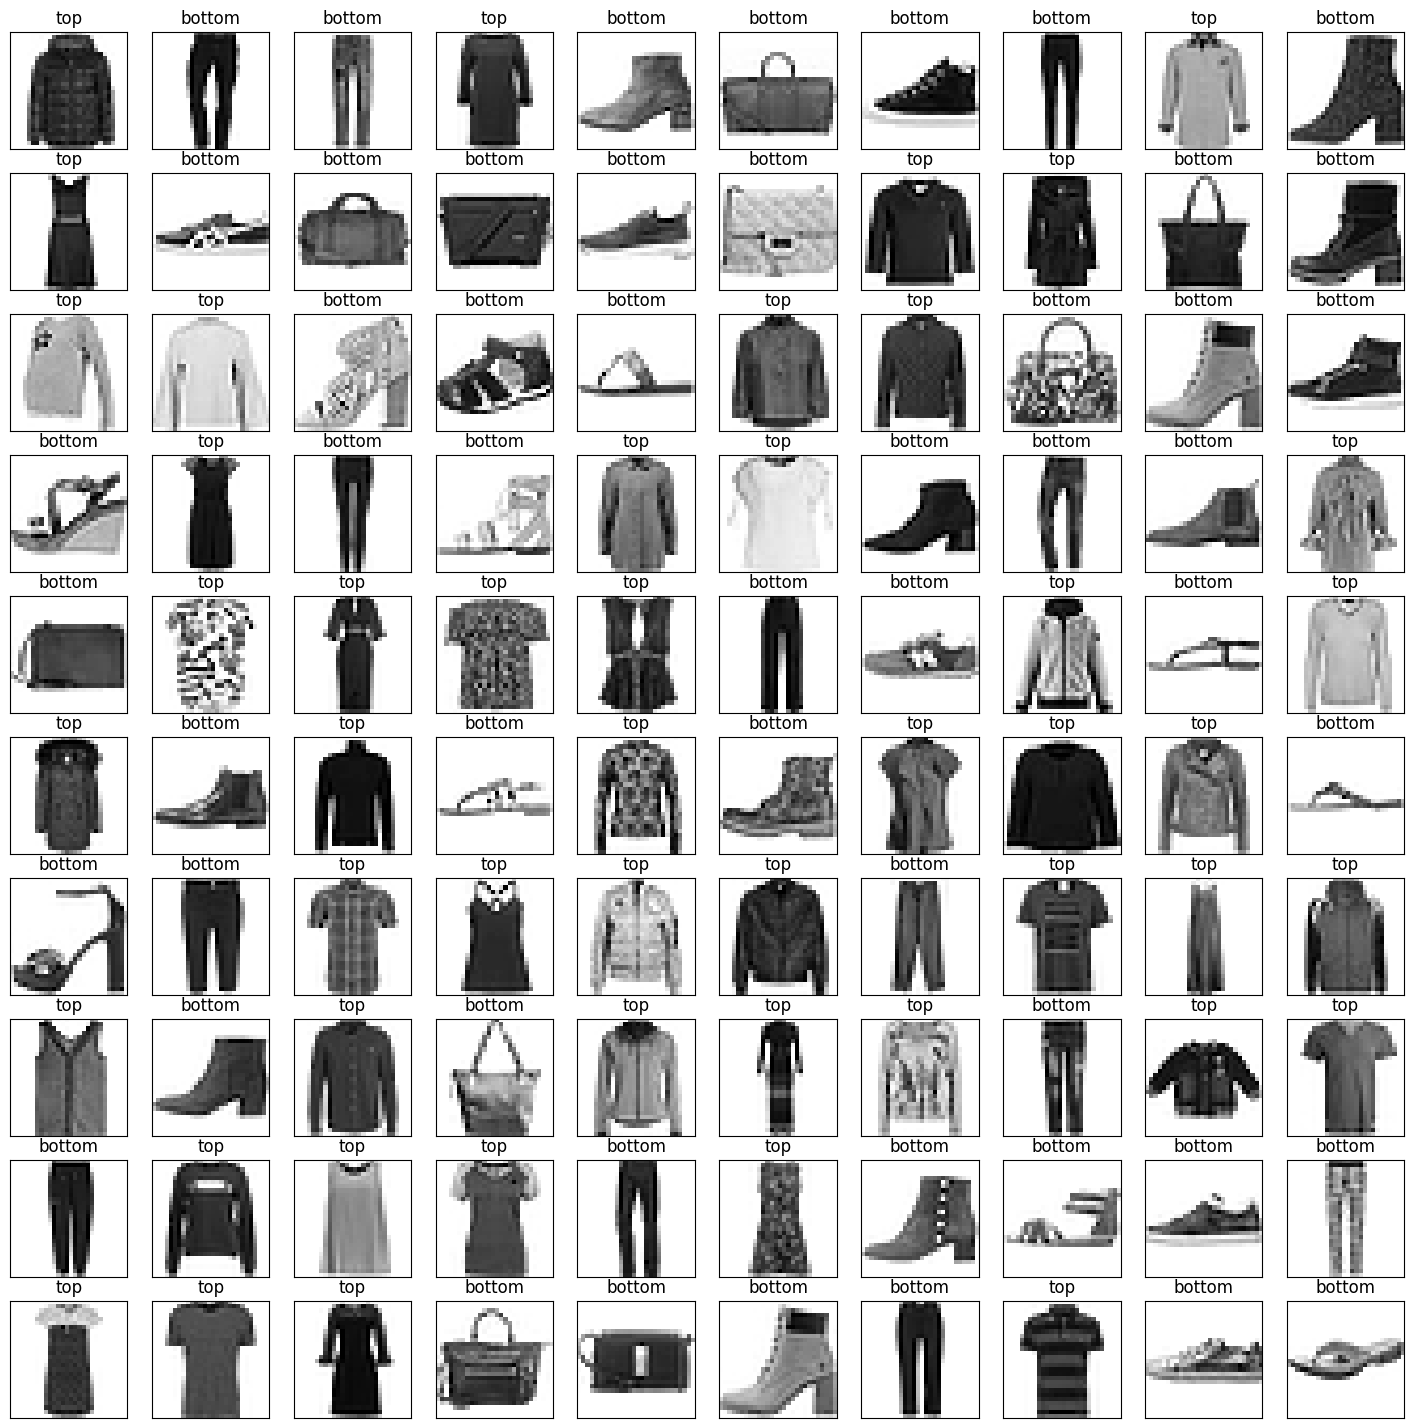

In [26]:
num_images = 50
random_indices = np.random.choice(X_test.shape[0], num_images)
plt.figure(figsize=(18, 18))
for i, index in enumerate(random_indices):
    plt.subplot(10, 10, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[index].squeeze(), cmap=plt.cm.binary)
    class_label = "top" if y_test[index] == 0 else "bottom"
    plt.title(f'{class_label}')
plt.show()
